<a href="https://colab.research.google.com/github/HPereiraVitor/Lab6/blob/main/lol_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

dir = 'drive/MyDrive/Colab/lol/'
ranks = ['challenger', 'grandmaster', 'master']

data = pd.DataFrame()

for rank in ranks:
    chall_df = pd.read_csv(dir+rank+'-ranked.csv', error_bad_lines=False)
    chall_df['Rank'] = rank
    print("Size of {}: {}".format(rank,chall_df.shape))
    data = data.append(chall_df, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 12482: expected 50 fields, saw 80\n'
b'Skipping line 18751: expected 50 fields, saw 59\n'


Size of challenger: (26903, 51)
Size of grandmaster: (65895, 51)


b'Skipping line 12489: expected 50 fields, saw 96\n'


Size of master: (107124, 51)


In [35]:
print("Total size: {}".format(data.shape))

Total size: (199922, 51)


In [36]:
categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']

for category in categories:
    chall_df = chall_df.drop(columns=['red'+category])

# Limpando dados que não queremos
X = chall_df.drop(columns=['gameId', 'gameDuraton', 'Rank', 'blueAvgLevel', 'blueTotalLevel', 'blueDeath', 'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt', 'blueTotalGold'])

# Queremos fazer os diagnósticos
y = chall_df['blueTotalGold']

In [37]:
X = X.drop(columns=['blueJungleMinionKills'])

In [38]:
print(chall_df.dtypes)

gameId                       int64
gameDuraton                  int64
blueWins                     int64
blueFirstBlood               int64
blueFirstTower               int64
blueFirstBaron               int64
blueFirstDragon              int64
blueFirstInhibitor           int64
blueDragonKills              int64
blueBaronKills               int64
blueTowerKills               int64
blueInhibitorKills           int64
blueWardPlaced               int64
blueWardkills                int64
blueKills                    int64
blueDeath                  float64
blueAssist                   int64
blueChampionDamageDealt      int64
blueTotalGold                int64
blueTotalMinionKills         int64
blueTotalLevel             float64
blueAvgLevel               float64
blueJungleMinionKills      float64
blueKillingSpree           float64
blueTotalHeal              float64
blueObjectDamageDealt      float64
Rank                        object
dtype: object


In [39]:
print(X.dtypes)

blueWins                   int64
blueFirstBlood             int64
blueFirstTower             int64
blueFirstBaron             int64
blueFirstDragon            int64
blueFirstInhibitor         int64
blueDragonKills            int64
blueBaronKills             int64
blueTowerKills             int64
blueInhibitorKills         int64
blueWardPlaced             int64
blueWardkills              int64
blueKills                  int64
blueAssist                 int64
blueChampionDamageDealt    int64
blueTotalMinionKills       int64
dtype: object


In [40]:
# Retira 20% para testar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
# Treina com 80%
from sklearn.neural_network import MLPRegressor

# Instancia um classificador tipo árvore de decisão com profundidade máxima 6
model = MLPRegressor(random_state=1, max_iter=2000)

# Treina o modelo
model.fit(X_train, y_train)

MLPRegressor(max_iter=2000, random_state=1)

In [42]:
# Predição
y_pred = model.predict(X_test)

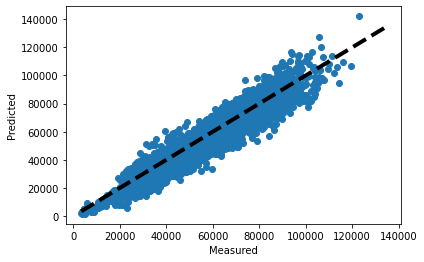

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()